# B81 bone vibrator operating range (Jansson et al., 2015 & 2017).

Guido Cattani, 15-01-2023

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def read_data_max(fin="/media/guido/LACIE/Beengeleiding/Max_output_Jansson_B81&B71.csv"):
    # read input file, clean and mung data
    df = pd.read_csv(fin)
    df.set_index('Unnamed: 0', drop=True, inplace=True)
    df.index.names = ['Data_type']
    return df

In [4]:
def read_data_VBT(fin="/media/guido/LACIE/Beengeleiding/B81_vibrotactile_thresholds.csv"):
    # read input file, clean and mung data
    df = pd.read_csv(fin)
    df = df.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], axis = 1)   # Deleate 2 columns
    df = df.drop([0, 2, 3], axis = 0)                 # Deleate a blanc row
    new = {0:'125', 1:'250', 2:'500', 3:'750', 4:'1000', 5:'1500', 6:'2000'}
    vbt = df[['VBT_125', 'VBT_250', 'VBT_500', 'VBT_750', 'VBT_1000', 'VBT_1500', 'VBT_2000']].T
    vbt.reset_index(drop=True, inplace=True)
    vbt.rename(new, inplace=True)
    vbt.rename(columns={1:'Mean_Vibrotactile_Thresholds_B81'}, inplace=True)
    sd = df[['SD_125', 'SD_250', 'SD_500', 'SD_750', 'SD_1000', 'SD_1500', 'SD_2000']].T
    sd.reset_index(drop=True, inplace=True)
    sd.rename(new, inplace=True)
    sd.rename(columns={1:'SD_Vibrotactile_Thresholds_B81'}, inplace=True)
    df1 = pd.concat([vbt, sd], axis=1).T
    return df1

In [5]:
def munging_data():
    vbt = read_data_VBT()
    max_out = read_data_max()
    df = pd.concat([max_out, vbt])
    df.drop(['Max_hl_B71', 'SD_max_hl_B71'], inplace=True)
    c125 = df.pop('125')
    df = pd.concat([c125, df], axis=1)
    return df

In [6]:
def calc_B81_ranges():
    df = munging_data()
    max_out_min_2sd = df.loc['Max_hl_B81'] - 2 * df.loc['SD_max_hl_B81']
    vbt_min_2sd = df.loc['Mean_Vibrotactile_Thresholds_B81'] - 2 * df.loc['SD_Vibrotactile_Thresholds_B81']
    data_min2sd = pd.DataFrame([max_out_min_2sd, vbt_min_2sd])
    lower = data_min2sd.min(axis=0)
    upper = data_min2sd.max(axis=0)
    b81_ranges = pd.DataFrame([lower, upper])
    b81_ranges = np.trunc(b81_ranges)
    b81_ranges.drop('125', axis=1, inplace=True)
    b81_ranges = b81_ranges.astype('int')
    b81_ranges.rename({0:'B81 normal range', 
                      1:'B81 extended range'}, inplace=True)

    return b81_ranges

In [7]:
def b81_rages_long():
    df = calc_B81_ranges()
    col_names = df.columns.values.tolist()
    df.reset_index(inplace=True)
    df.rename({'index': 'Range'}, axis=1, inplace=True)
    df1 = pd.melt(df, id_vars='Range', value_vars=col_names, var_name='Frequency [Hz]', 
                        value_name='Hearing_levels [dBHL]', 
                        col_level=None, ignore_index=True)
    return df1

In [8]:
def show_plot():
    df = b81_rages_long() # plot input data
    
    # make a scatterplot
    sns.set_style("whitegrid")

    ax = sns.lineplot(data=df, x=df['Frequency [Hz]'], y=df['Hearing_levels [dBHL]'], 
                      hue=df['Range'], palette='colorblind', 
                      hue_order=['B81 extended range', 'B81 normal range']) 

    plt.ylim(reversed(plt.ylim(0, 100))) # reverse y as
    ax.xaxis.set_ticks_position('top')   # place x axes on top
    ax.xaxis.set_label_position('top')   # place x label on top
    plt.grid(visible=True, which='major', axis='both') # add horizon. & vertical rasters

    # place legend outside plot top right corner
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    plt.savefig("/media/guido/LACIE/Beengeleiding/b81_operating_range.png", 
                dpi=300, bbox_inches = "tight")
    plt.show()

In [9]:
def execution():
    data = calc_B81_ranges()
    data.to_csv('/media/guido/LACIE/Beengeleiding/b81_operating_range.csv')
    show_plot()
    return data

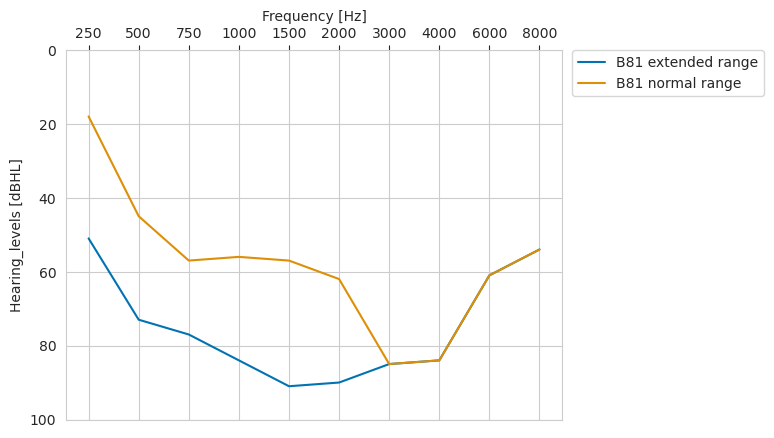

,250,500,750,1000,1500,2000,3000,4000,6000,8000
B81 normal range,18,45,57,56,57,62,85,84,61,54
B81 extended range,51,73,77,84,91,90,85,84,61,54


In [10]:
execution()

Data are taken from:

Karl-Johan Fredén Jansson, Bo Håkansson, Leif Johannsen & Tomas Tengstrand (2015) 
Electro-acoustic performance of the new bone vibrator Radioear B81: 
A comparison with the conventional Radioear B71, 
International Journal of Audiology, 54:5, 334-340, 
DOI: 10.3109/14992027.2014.980521

Fredén Jansson, K. J., Håkansson, B., Reinfeldt, S., Fröhlich, L., & Rahne, T. (2017). Vibrotactile Thresholds on the Mastoid and Forehead Position of Deaf Patients Using Radioear B71 and B81. Ear and hearing, 38(6), 714–723. https://doi.org/10.1097/AUD.0000000000000456
